In [25]:
import os
import sys
from pathlib import Path
# Check one level up for imports (allows src modules)
sys.path.append(str(Path.cwd().parent))

import pandas as pd

from src.preprocessing import clean_data
from src.models import get_models

from sklearn.metrics import accuracy_score

from datetime import datetime

Training final model: Logistic Regression
Final model trained on full training dataset.


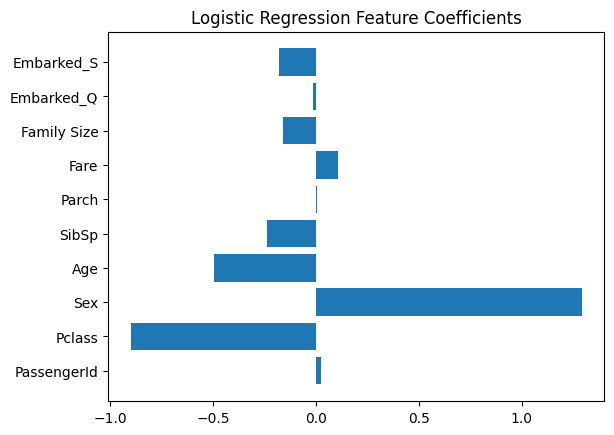

Submission saved to /mnt/c/Users/guada/Desktop/Python/kaggle/titanic-data-set/data/submissions/final_submission_logistic_scaled_20260208_1139.csv


In [ ]:
# ---- Load and preprocess full datasets ----
train = pd.read_csv("../data/raw/train.csv")
test = pd.read_csv("../data/raw/test.csv")

# Preprocess training data
X_train, y_train = clean_data(train, is_train=True)

# Preprocess test data (no target column)
X_test, _ = clean_data(test, is_train=False)


# --- Initialize best model ---
models = get_models()


# Select most accurate model from model comparison
best_model_name = "Logistic Regression"
model = models[best_model_name]

print(f"Training final model: {best_model_name}")


# --- Train model using full training dataset ---
model.fit(X_train, y_train)
print("Final model trained on full training dataset.")


# --- Predict test set ---
test_predictions = model.predict(X_test)


# --- Plit feature importance ---
if best_model_name == "Logistic Regression":
    import matplotlib.pyplot as plt
    coefs = model.named_steps['model'].coef_[0]
    features = X_train.columns
    plt.barh(features, coefs)
    plt.title("Logistic Regression Feature Coefficients")
    plt.show()


# --- Save submission ---
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": test_predictions
})

project_root = Path.cwd().parent

submissions_dir = project_root / "data" / "submissions"
os.makedirs(submissions_dir, exist_ok=True)

# Timestampe and model name for versioning
timestamp = datetime.now().strftime("%Y%m%d_%H%M")
model_name = "logistic_scaled"

# Filename with timestamp
submission_file = submissions_dir / f"final_submission_{model_name}_{timestamp}.csv"
submission.to_csv(submission_file, index=False)

print(f"Submission saved to {submission_file}")


In [24]:
# --- Sanity check ---
print(submission.head())
submission['Survived'].value_counts(normalize=True)

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


Survived
0    0.605263
1    0.394737
Name: proportion, dtype: float64